> This is a self-correcting activity generated by [nbgrader](https://nbgrader.readthedocs.io). Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Run subsequent cells to check your code.

---

# Classify common images

In this activity, you'll train models to associate images representing common objects with their class.

The [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. The classes are completely mutually exclusive. There are 50,000 training images and 10,000 test images.

![CIFAR10 images](images/cifar10.png)

## Package setup

In [1]:
# Import base packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [11]:
# Import ML packages (edit this list if needed)
import tensorflow as tf
print(f'TensorFlow version: {tf.__version__}')
print(f'Keras version: {tf.keras.__version__}')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

TensorFlow version: 2.3.1
Keras version: 2.4.0


## Utility functions

In [4]:
def plot_loss_acc(history):
    """Plot training and (optionally) validation loss and accuracy"""

    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, '.--', label='Training loss')
    final_loss = loss[-1]
    title = 'Training loss: {:.4f}'.format(final_loss)
    plt.ylabel('Loss')
    if 'val_loss' in history.history:
        val_loss = history.history['val_loss']
        plt.plot(epochs, val_loss, 'o-', label='Validation loss')
        final_val_loss = val_loss[-1]
        title += ', Validation loss: {:.4f}'.format(final_val_loss)
    plt.title(title)
    plt.legend()

    acc = history.history['accuracy']

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, '.--', label='Training acc')
    final_acc = acc[-1]
    title = 'Training accuracy: {:.2f}%'.format(final_acc * 100)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if 'val_accuracy' in history.history:
        val_acc = history.history['val_accuracy']
        plt.plot(epochs, val_acc, 'o-', label='Validation acc')
        final_val_acc = val_acc[-1]
        title += ', Validation accuracy: {:.2f}%'.format(final_val_acc * 100)
    plt.title(title)
    plt.legend()

## Step 1: Loading the data

### Question

* Load the CIFAR10 dataset included with Keras.
* Display the first 30 test images.

In [5]:
# Load the data

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 1533s 9us/step


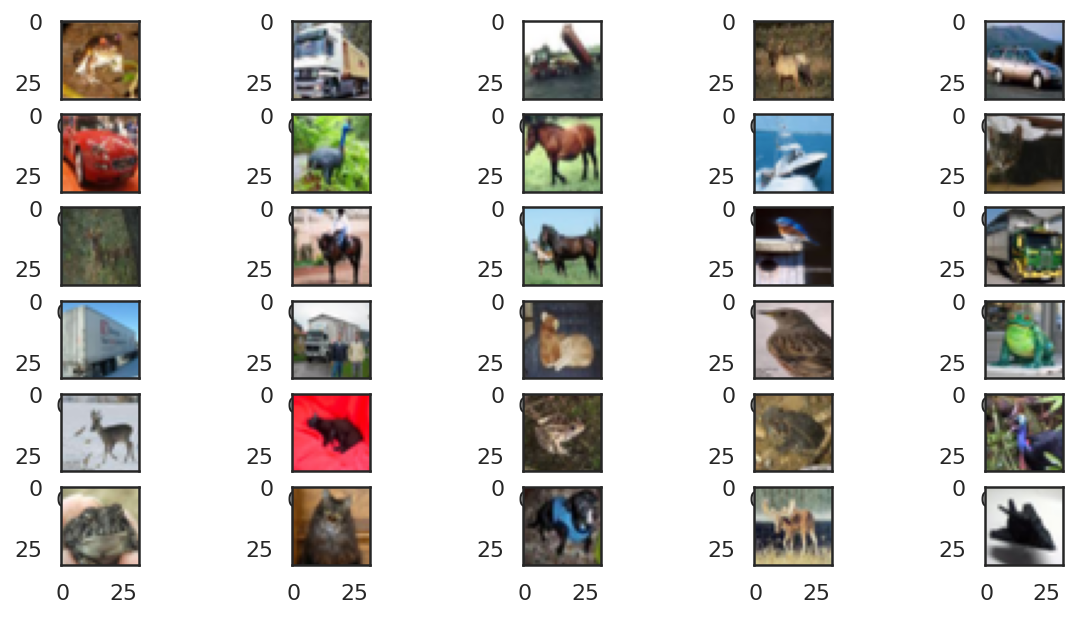

In [7]:
# Plot the first 30 images

with sns.axes_style("white"):  # Temporary hide Seaborn grid lines
    plt.figure(figsize=(10, 5))
    for i in range(30):
        image = train_images[i]
        fig = plt.subplot(6, 5, i + 1)
        plt.imshow(image, cmap=plt.cm.binary)

## Step 2: Training a dense neural network

### Question

* Prepare data for training with a dense network.
* Train a model on the data to obtain the expected validation accuracy. Use 20% of the training set for validation. Store the training history in a variable named `history`.

In [8]:
# Prepare data for training
x_train = train_images.astype('float32') / 255
x_test = test_images.astype('float32') / 255

print(f'x_train: {x_train.shape}. x_test: {x_test.shape}')

# One-hot encode labels
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

#Show sample of encoded targets
df_y_train = pd.DataFrame(y_train)
df_y_train.sample(n=10)

print(f'y_train: {y_train.shape}. y_test: {y_test.shape}')

x_train: (50000, 32, 32, 3). x_test: (10000, 32, 32, 3)
y_train: (50000, 10). y_test: (10000, 10)


In [12]:
# Create and train a model

model = Sequential()

# Convolution + pooling layers
model.add(
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3))
)
model.add(
    MaxPooling2D(pool_size=(2, 2))
)
model.add(
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu")
)
model.add(
    MaxPooling2D(pool_size=(2, 2))
)

# Fully connected layers

# Flatten to reshape data for Dense layer
model.add(Flatten())
model.add(Dense(128, activation="relu"))

# Dropout to fight overfitting
model.add(Dropout(0.5))

# Classification layer
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               295040    
_________________________________________________________________
dropout (Dropout)            (None, 128)              

In [14]:
# Prepare and train model

model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy']
)

# Train model, use 20% of training data for validation
history = model.fit(
    x_train, y_train , epochs=10, verbose=1, batch_size=128, validation_split=0.2
)

Epoch 1/10
313/313 [==============================] - 24s 78ms/step - loss: 1.7573 - accuracy: 0.3550 - val_loss: 1.4239 - val_accuracy: 0.4990
Epoch 2/10
313/313 [==============================] - 23s 75ms/step - loss: 1.4460 - accuracy: 0.4756 - val_loss: 1.2700 - val_accuracy: 0.5511
Epoch 3/10
313/313 [==============================] - 24s 75ms/step - loss: 1.3028 - accuracy: 0.5356 - val_loss: 1.1656 - val_accuracy: 0.5929
Epoch 4/10
313/313 [==============================] - 24s 76ms/step - loss: 1.2148 - accuracy: 0.5690 - val_loss: 1.1023 - val_accuracy: 0.6118
Epoch 5/10
313/313 [==============================] - 24s 76ms/step - loss: 1.1616 - accuracy: 0.5861 - val_loss: 1.0442 - val_accuracy: 0.6360
Epoch 6/10
313/313 [==============================] - 24s 76ms/step - loss: 1.1151 - accuracy: 0.6060 - val_loss: 1.0233 - val_accuracy: 0.6404
Epoch 7/10
313/313 [==============================] - 24s 76ms/step - loss: 1.0726 - accuracy: 0.6234 - val_loss: 0.9829 - val_accuracy:

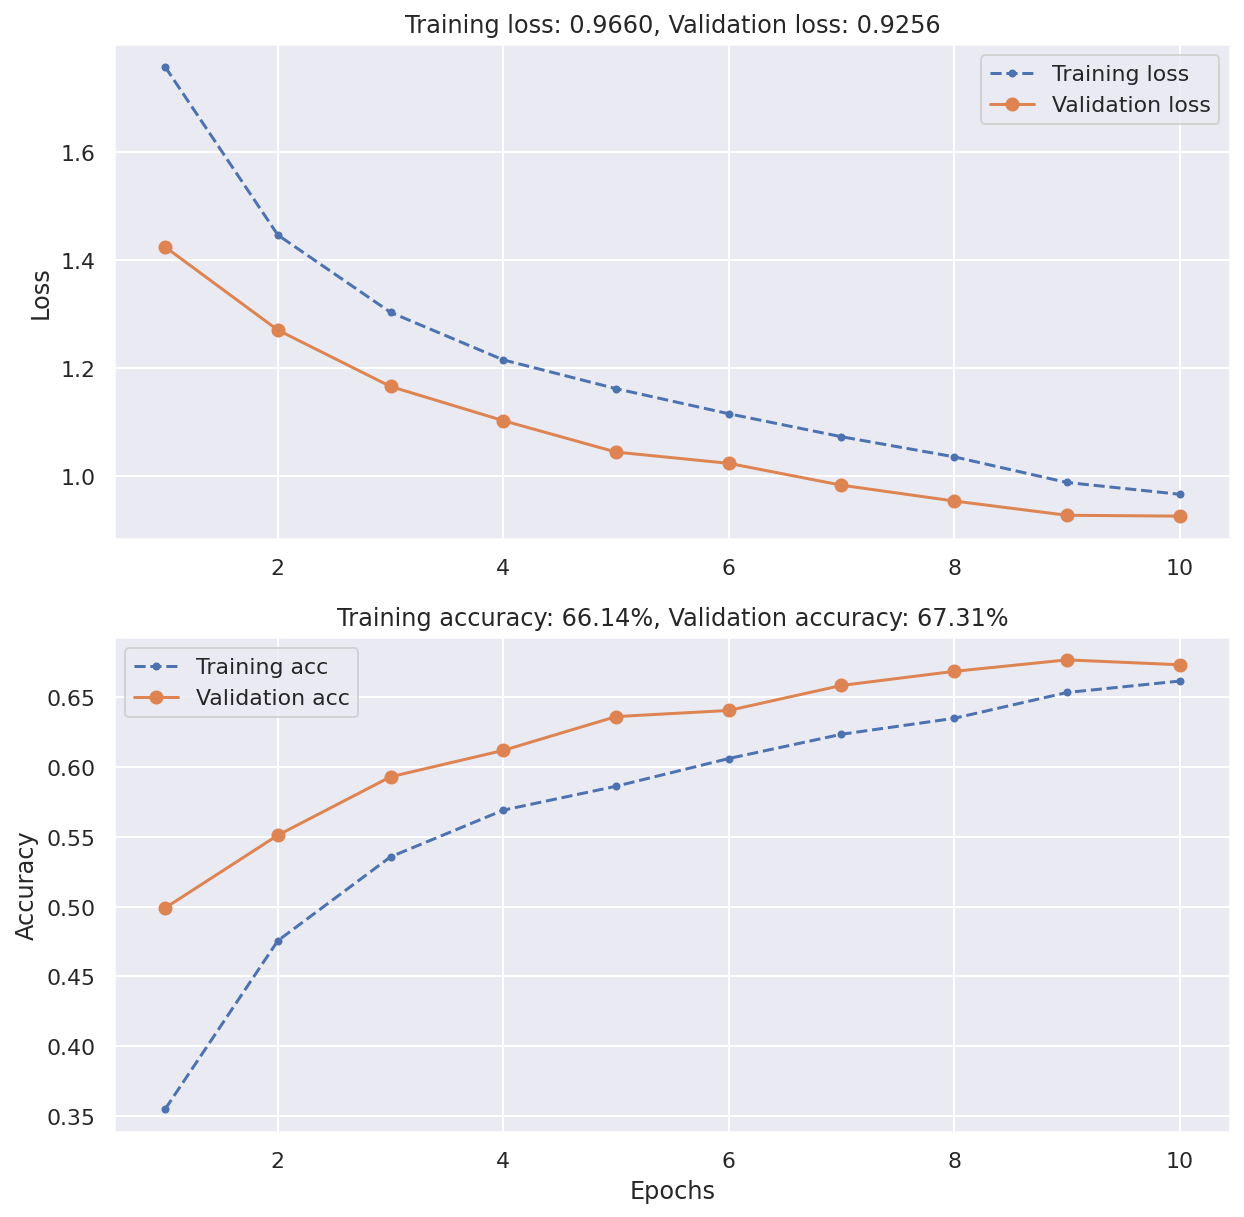

In [15]:
# Plot training history
plot_loss_acc(history)

In [16]:
# Retrieve final validation accuracy
val_acc = history.history['val_accuracy'][-1]

# Assert final accuracy
assert val_acc > 0.45

In [17]:
# Evaluate model performance on test data
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Test accuracy: {test_acc * 100:.2f}%')

Test accuracy: 67.61%


## Step 3: Training a convnet

### Question

Train a model on the data to obtain the expected validation accuracy. Store the training history in a variable named `history`.

In [ ]:
# Create a convnet

# YOUR CODE HERE

In [ ]:
# Train the convnet

# YOUR CODE HERE

In [ ]:
# Plot training history
plot_loss_acc(history)

In [ ]:
# Retrieve final validation accuracy
val_acc = history.history['val_accuracy'][-1]

# Assert final validation accuracy
assert val_acc > 0.66

In [ ]:
# Evaluate model performance on test data
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Test accuracy: {test_acc * 100:.2f}%')